<h1 align="center"> Tabular Data with PyTorch </h1>

In this notebook, I will explore PyTorch's capabilities to deal with tabular data. I will be solving a regression problem using fully connected feed forward neural networks. Then in 2nd section we will explore the models for classification problems as well. 

## Problem Statement - Classification

Here we need to perform a binary classification on the Census Income dataset available from the <a href = 'http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a><br>

The goal is to determine if an individual earns more than $50K based on a set of continuous and categorical variables.

### Census Income Dataset
Here we're using the Census Income dataset available from the <a href='http://archive.ics.uci.edu/ml/datasets/Adult'>UC Irvine Machine Learning Repository</a>.

The full dataset has 48,842 entries.

**Here is Quick Summary of the data:**

Each entry contains the following information about an individual:
* <strong>age</strong>: the age of an individual as an integer from 18 to 90 (continuous)
* <strong>sex</strong>: Male or Female (categorical)
* <strong>education</strong>: represents the highest level of education achieved by an individual (categorical)
* <strong>education_num</strong>: represents education as an integer from 3 to 16 (categorical)
<div><table style="display: inline-block">
<tr><td>3</td><td>5th-6th</td><td>8</td><td>12th</td><td>13</td><td>Bachelors</td></tr>
<tr><td>4</td><td>7th-8th</td><td>9</td><td>HS-grad</td><td>14</td><td>Masters</td></tr>
<tr><td>5</td><td>9th</td><td>10</td><td>Some-college</td><td>15</td><td>Prof-school</td></tr>
<tr><td>6</td><td>10th</td><td>11</td><td>Assoc-voc</td><td>16</td><td>Doctorate</td></tr>
<tr><td>7</td><td>11th</td><td>12</td><td>Assoc-acdm</td></tr>
</table></div>
* <strong>marital-status</strong>: marital status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Married</td><td>Divorced</td><td>Married-spouse-absent</td></tr>
<tr><td>Separated</td><td>Widowed</td><td>Never-married</td></tr>
</table></div>
* <strong>workclass</strong>: a general term to represent the employment status of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Local-gov</td><td>Private</td></tr>
<tr><td>State-gov</td><td>Self-emp</td></tr>
<tr><td>Federal-gov</td></tr>
</table></div>
* <strong>occupation</strong>: the general type of occupation of an individual (categorical)
<div><table style="display: inline-block">
<tr><td>Adm-clerical</td><td>Handlers-cleaners</td><td>Protective-serv</td></tr>
<tr><td>Craft-repair</td><td>Machine-op-inspct</td><td>Sales</td></tr>
<tr><td>Exec-managerial</td><td>Other-service</td><td>Tech-support</td></tr>
<tr><td>Farming-fishing</td><td>Prof-specialty</td><td>Transport-moving</td></tr>
</table></div>
* <strong>hours-per-week</strong>: the hours an individual has reported to work per week as an integer from 20 to 90 (continuous)
* <strong>income</strong>: whether or not an individual makes more than \\$50,000 annually (label)
* <strong>label</strong>: income represented as an integer (0: <=\\$50K, 1: >\\$50K) (optional label)


## Imports

In [149]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [221]:
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt


## Load the data

In [151]:
df = pd.read_csv('../data/income.csv')

In [152]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


In [153]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [154]:
len(df.columns)

10

## Feature Selection

In the whole data we have around 10 columns. We need to seggregate columns into predictors and response categories.



In [155]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [156]:
predictors = ['age', 'sex', 'education', 'education-num', 'marital-status', 'workclass', 'occupation', 'hours-per-week']

response = ['label']

I have dropped `income` feature while relevant features since `label` and `income` both are saying same thing.


In [157]:
X = df[predictors]
y = df[response]

print(f"Shape of predictor subspace is : {X.shape}")
print(f"Shape of response subspace is : {y.shape}")

Shape of predictor subspace is : (30000, 8)
Shape of response subspace is : (30000, 1)


## Feature Encoding

Most of machine learning models can't handle categorical data directly. We need to encode them into numeric values before feeding them to models. The conversion of categorical values into some numeric ones is called encoding.

For encoding purpose I will be using `Embedding` layers of PyTorch.

Let's divide selected features into categorical and numerical class.

In [158]:
y.dtypes

label    int64
dtype: object

Response attribute is already in numeric mode so we will not encode it.

In [159]:
X.dtypes

age                int64
sex               object
education         object
education-num      int64
marital-status    object
workclass         object
occupation        object
hours-per-week     int64
dtype: object

Here we do have bunch of categorical columns and numeric ones

In [160]:
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation']

cont_cols = ['age', 'hours-per-week']


If have only 2 numeric measures and 5 categorical measures. We can directly feed numeric values but we have to separately deal with categorical values.

`Pandas` provide efficient ways to deal with categorical varibale. To leverage this functionality the measures should be of `category` type.

Let's typecast them into `category`.

In [161]:
X = X.copy()

In [162]:
for cat_col in cat_cols:
    X.loc[:, cat_col] = X.loc[:, cat_col].astype('category')

In [163]:
X.dtypes

age                  int64
sex               category
education         category
education-num        int64
marital-status    category
workclass         category
occupation        category
hours-per-week       int64
dtype: object

In [164]:
X.head(2)

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50


Note that we can use `series.cat.codes` and `series.cats.categories` to get encoded codes and original values over categorical features now.

In [165]:
X['sex'].cat.codes

0        1
1        1
2        1
3        0
4        0
        ..
29995    1
29996    1
29997    1
29998    0
29999    1
Length: 30000, dtype: int8

In [166]:
X['sex'].cat.categories

Index(['Female', 'Male'], dtype='object')

**Lets divide the predictor space into categorical and numerical subspace**

In [167]:
X_cont = X[cont_cols]

X_cat = X[cat_cols]

print(f"Shape of numeric subspace is : {X_cont.shape}")
print(f"Shape of categorical subspace is : {X_cat.shape}")

Shape of numeric subspace is : (30000, 2)
Shape of categorical subspace is : (30000, 5)


### set embedding size

- I am using embedding layers provided by `torch.nn.Embedding(ni, nf)` to get encoded values for categorical columns.
- We need to decide embedding size. 
- The size of the embedding layer can be anything but here I will be using number of distinct categories to decide embedding size of that feature

In [168]:
cat_cols

['sex', 'education', 'marital-status', 'workclass', 'occupation']

In [169]:
#distinct categories for each attribute
cat_szs = [len(X_cat[cat_col].cat.categories) for cat_col in cat_cols]
print(cat_szs)

[2, 14, 6, 5, 12]


Based on these distinct categories we can deduce the embedding size.

In [170]:
cat_szs

[2, 14, 6, 5, 12]

In [171]:
emb_szs = [(cat_sz, min((cat_sz+1)//2,50)) for cat_sz in cat_szs]

emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

I have put upper limit of 50 on embedding size because if we have embedding of high dimension it gonna make whole computation quite expensive despite having little or no effect on performance.

We will be using these embedding dimension in modeling part.

## Feature Transformations

We are done with feature selection and feature encoding now we need to transform values in proper manner and with proper data type so that we can feed them to models.

PyTorch ask to convert values into tenors before doing any operations over them.

Let's do that

**Convert conts values into tensor**

In [172]:
conts = torch.tensor(X_cont.values, dtype=torch.float32)
conts

tensor([[27., 40.],
        [47., 50.],
        [59., 20.],
        ...,
        [47., 55.],
        [32., 40.],
        [33., 60.]])

I have converted values in `torch.float32` because we will be using normalization layer and it works well on floating data points.

**Convert cats values in tensor**

In [173]:
cats_codes = [X_cat[col].cat.codes.values for col in cat_cols]

#stack these code such that they represent a row in the original data
cats_codes = np.stack(cats_codes, 1)

cats_codes


array([[ 1, 10,  3,  2,  1],
       [ 1, 11,  1,  1,  2],
       [ 1, 10,  0,  3,  7],
       ...,
       [ 1, 12,  1,  2,  7],
       [ 0, 13,  3,  2,  0],
       [ 1,  6,  1,  3,  2]], dtype=int8)

In [174]:
#type cast into tensors
cats = torch.tensor(cats_codes, dtype=torch.int32)
cats

tensor([[ 1, 10,  3,  2,  1],
        [ 1, 11,  1,  1,  2],
        [ 1, 10,  0,  3,  7],
        ...,
        [ 1, 12,  1,  2,  7],
        [ 0, 13,  3,  2,  0],
        [ 1,  6,  1,  3,  2]], dtype=torch.int32)

**Convert label into tenosrs**

In [175]:
y.head(3)

,label
0,0
1,1
2,0


In [176]:
y = torch.tensor(y.values, dtype=torch.int64).flatten()

y

tensor([0, 1, 0,  ..., 1, 0, 1])

In [177]:
y.shape

torch.Size([30000])

Note that this is a classifciation problem so the labels are categorical and the encoded values should be integer instead of floating values.


### Train, Test and Validation Split

In [178]:
#total size
X.shape

(30000, 8)

We have 30,000 examples and we can adopt `75:15:10` division for traning, validation and test splits. We will be applying this division across predictors and labels both. In above sections we seggregated the predictors based on their data type mainly into `cats` and `conts`

In [179]:
total_size = X.shape[0]

train_size = int(total_size*0.75)
valid_size = int(total_size*0.15)
test_size = total_size - train_size - valid_size

#get train data
conts_train = conts[:train_size]
cats_train = cats[:train_size]
y_train = y[:train_size]

#get validation size
cats_valid = cats[train_size:train_size+valid_size]
conts_valid = conts[train_size:train_size+valid_size]
y_valid = y[train_size:train_size+valid_size]

#get test size
cats_test = cats[train_size+valid_size:total_size]
conts_test = conts[train_size+valid_size:total_size]
y_test = y[train_size+valid_size:total_size]

print(f"Train size : {conts_train.shape}")
print(f"Test size : {conts_test.shape}")
print(f"Validation size : {conts_valid.shape}")


Train size : torch.Size([22500, 2])
Test size : torch.Size([3000, 2])
Validation size : torch.Size([4500, 2])


## Modeling

Since we are done with all kind of preprocessing that one should performed before feeding the values to neural networks. It's time to build a model wich can take the input and come up with possible classes.

Since we are working with Tabular Data, I will be using Linear layers and for categorical columns Embedding Layer is preferable before feeding them to Linear layers.

Since this is a classification problem and only two values are possible either `0` and `1`, I am gonna use `nn.CrossEntropyLoss(y_pred, y_true)` as loss functions.

For updating the parameters after backpropagation, I am using `torch.optim.Adam(model.parameters(), lr=lr)` as a optimizer.

Final Model Structures:

1. Embedding layer to get embeddings corresponding to categorical codes.
2. A batch normalization layer for continous variables.
3. Cancat categorical embeddings and normalized values of continous values
4. A Linear layer having dimension of (input_size, 100)
5. Relu activation function
6. Dropout layer(p=0.4)
7. A linear layer having dimension of (100, 50)
8. Relu activation function
9. Dropout layer(p=0.4)
10. A sigmoid function

Let's define a class for model

In [204]:
class Classifier(nn.Module):

    def __init__(self, emb_szs, n_cont, layers, out_sz, p=0.5):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(n_cont)
        self.embd_layer = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        n_emb = sum([nf for ni, nf in emb_szs])
        n_in = n_cont+n_emb
        layerslist = []

        for layer_size in layers:
            layerslist.append(nn.Linear(n_in, layer_size))
            layerslist.append(nn.ReLU(inplace=True))
            layerslist.append(nn.Dropout1d(p))
            n_in = layer_size
        #append sigmoid function as well
        layerslist.append(nn.Linear(layers[-1], out_sz))
        self.resultant_struct = nn.Sequential(*layerslist)

    
    def forward(self, conts, cats):
        embeddings = []
        for i, emb in enumerate(self.embd_layer):
            embeddings.append(emb(cats[:, i]))
        cats = torch.cat(embeddings, 1)
        #batch normalization for conts
        conts = self.bn_cont(conts)
        #concat both in single variable X
        X = torch.cat([conts, cats], 1)

        return self.resultant_struct(X)




The `CrossEntropyLoss` function in PyTorch combines the softmax/sigmoid function with the cross entropy calculation, so we don’t need any activation function at the output layer of our model.

**set the manusal seed to make outcome reproducible**

In [197]:
torch.manual_seed(42)

**Create an instance of above model class**

In [216]:
model  = Classifier(emb_szs, conts.shape[1], [50], 2, 0.4)

In [217]:
model

Classifier(
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (embd_layer): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(14, 7)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(12, 6)
  )
  (resultant_struct): Sequential(
    (0): Linear(in_features=22, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout1d(p=0.4, inplace=False)
    (3): Linear(in_features=50, out_features=2, bias=True)
  )
)

### Define loss functions and optimizer

Here we are using `nn.CrossEntropyLoss()` as a loss function and `torch.optim.Adam()` as an optimizer.

In [218]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Model's Traning

We are done with modelsing part now it's time to show some data to model and reduce it's biasness

In [219]:
y_train.shape

torch.Size([22500])

In [220]:
import time
start_time = time.time()

epochs = 300
train_losses = []
valid_losses = []

for i in range(epochs):
    #set model in train mode
    model.train()
    i+=1
    y_pred = model(conts_train, cats_train)
    loss = criterion(y_pred, y_train)
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    #validation loss
    #set model in eval mode
    model.eval()
    with torch.no_grad():
        y_valid_pred = model(conts_valid, cats_valid)
        valid_loss = criterion(y_valid_pred, y_valid)
        valid_losses.append(valid_loss.item())
    

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 0.74205756
epoch:  26  loss: 0.56145668
epoch:  51  loss: 0.50201505
epoch:  76  loss: 0.46742755
epoch: 101  loss: 0.45239389
epoch: 126  loss: 0.44007245
epoch: 151  loss: 0.43061072
epoch: 176  loss: 0.42192248
epoch: 201  loss: 0.41536188
epoch: 226  loss: 0.41635925
epoch: 251  loss: 0.40426815
epoch: 276  loss: 0.40543133
epoch: 300  loss: 0.40311489

Duration: 5 seconds


## Model's Evaluation

### Train loss vs Validation loss 

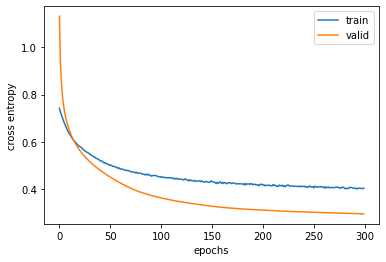

In [222]:

plt.plot(train_losses, label="train")
plt.plot(valid_losses, label="valid")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

### Model's Inference

In [223]:
# TO EVALUATE THE TEST SET
with torch.no_grad():
    y_pred = model(conts_test, cats_test)
    loss = criterion(y_pred, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.29200649
